# **Student Stress Factors - Capstone Project In R**

## Table of Contents

[1. Introduction](#introduction)

[2. Ask Phase](#ask-phase)

[3. Prepare Phase](#prepare-phase)

[4. Process Phase](#process-phase)

[5. Analyze and Share Phase](#analyze-and-share-phase)

&emsp;[5.1. Descriptive Statistics](#51-descriptive-statistics) \
&emsp;&emsp;[5.1.1. How many students are in the dataset](#511) \
&emsp;&emsp;[5.1.2. What is the average anxiety level of students in the dataset](#512) \
&emsp;&emsp;[5.1.3. How many students have reported a history of mental health issues](#513)

&emsp;[5.2. Psychological Factors](#52-psychological-factors) \
&emsp;&emsp;[5.2.1. How many students have self-esteem below the normal level](#521) \
&emsp;&emsp;[5.2.2. What percentage of students have reported experiencing depression](#522)

&emsp;[5.3. Physiological Factors](#53-physiological-factors) \
&emsp;&emsp;[5.3.1. How many students experience headaches frequently](#531) \
&emsp;&emsp;[5.3.2. What is the average blood pressure reading among the students](#532) \
&emsp;&emsp;[5.3.3. How many students rate their sleep quality as poor](#533)

&emsp;[5.4. Environmental Factors](#54-environmental-factors) \
&emsp;&emsp;[5.4.1. How many students live in conditions with high noise levels](#541) \
&emsp;&emsp;[5.4.2. What percentage of students feel unsafe in their living conditions](#542) \
&emsp;&emsp;[5.4.3. How many students have reported not having their basic needs met](#543)

&emsp;[5.5. Academic Factors](#55-academic-factors) \
&emsp;&emsp;[5.5.1. How many students rate their academic performance as below average](#551) \
&emsp;&emsp;[5.5.2. What is the average study load reported by students](#552)

&emsp;[5.6. Social Factors](#56-social-factors) \
&emsp;&emsp;[5.6.1. How many students feel they have strong social support](#561) \
&emsp;&emsp;[5.6.2. What percentage of students have experienced bullying](#562)

&emsp;[5.7. Comparative Analysis](#57-comparative-analysis) \
&emsp;&emsp;[5.7.1. Is there a correlation between anxiety level and academic performance](#571) \
&emsp;&emsp;[5.7.2. Are students who experience bullying more likely to have a history of mental health issues](#572)

&emsp;[5.8. General Exploration](#58-general-exploration) \
&emsp;&emsp;[5.8.1. Which group of factors (psychological, physiological, environmental, academic, or social) has the highest number of students reporting negative experiences or conditions](#581) \
&emsp;&emsp;[5.8.2. Are there any noticeable trends or patterns when comparing different factors](#582) \
&emsp;&emsp;[5.8.3. Which specific feature within each group of factors has the most significant impact on student stress based on the dataset](#583)

[6. Act Phase](#act-phase)

[7. Conclusion](#conclusion)

## 1. Introduction
<a id="introduction"></a>

Students efficiency in studying is constantly affected by stress. Stress in healthy amounts may serve as a great motivation and assist progress in education. However its overabundance hinders and halts academic success.

The aims of this capstone project are to analyze and determine what factors influence stress levels and give recommendations about how to regulate them mindfully. This analysis will show the skills obtained as a result of studying in the Google Data Analytics course.

## 2. Ask Phase
<a id="ask-phase"></a>

The business task is to determine the most significant features influencing stress levels. In order to resolve it, these main questions need to be answered:

1) Which group of factors (Psychological, Physiological, Environmental, Academic, Social) has the highest number of students reporting negative experiences or conditions?
2) Are there any noticeable trends or patterns when comparing different factors?
3) Which specific feature within each group of factors has the most significant impact on student stress, based on the dataset?

Before trying to answer them, the data has to be thoroughly analyzed.

## 3. Prepare Phase
<a id="prepare-phase"></a>

The given dataset is created by Chhabi Acharya, who surveyed students from Jun.2022 to Oct.2022 in Dharan, Nepal, to collect data that delves into the student experience. The data is open-source and stored in a .csv file on Kaggle. The features in the dataset are balanced between groups of different factors: psychological, physiological, environmental, academic and social. All data is discrete and numerical.

## 4. Process Phase
<a id="process-phase"></a>

The chosen tool for data processing and its analysis is the R programming language. With its help, it will be possible to build a model that will predict stress levels given the data from factors. However, the main purpose of this model is to show the specific factors that carry the greatest significance concerning stress. Moreover, it is convenient to preprocess data and quickly analyze it, as well as visually represent it.

Installing packages:

In [1]:
library(tidyverse)
library(ggplot2)
library(GGally)
library(caret)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift




Importing data:

In [2]:
students_df <- read.csv("StressLevelDataset.csv")

Warning message in file(file, "rt"):
"cannot open file 'StressLevelDataset.csv': No such file or directory"


ERROR: Error in file(file, "rt"): cannot open the connection


Previewing data:

In [88]:
head(students_df)

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,⋯,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,14,20,0,11,2,1,2,4,2,3,⋯,2,3,2,3,3,2,3,3,2,1
2,15,8,1,15,5,3,1,4,3,1,⋯,2,1,4,1,5,1,4,5,5,2
3,12,18,1,14,2,1,2,2,2,2,⋯,2,2,3,3,2,2,3,2,2,1
4,16,12,1,15,4,3,1,3,4,2,⋯,2,2,4,1,4,1,4,4,5,2
5,16,28,0,7,2,3,5,1,3,2,⋯,3,4,3,1,2,1,5,0,5,1
6,20,13,1,21,3,3,1,4,3,2,⋯,1,2,5,2,5,1,4,4,5,2


In [89]:
dim(students_df)  # How many rows and columns in total

[1] 1100   21

In [90]:
apply(students_df, 2, summary)  # Statistical summary of the data columns

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,⋯,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
Min.,0.00000,0.00000,0.0000000,0.00000,0.000000,1.000000,0.00,0.000000,0.000000,0.000000,⋯,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000000
1st Qu.,6.00000,11.00000,0.0000000,6.00000,1.000000,1.000000,1.00,2.000000,2.000000,2.000000,⋯,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.0000000
Median,11.00000,19.00000,0.0000000,12.00000,3.000000,2.000000,2.50,3.000000,3.000000,2.000000,⋯,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,3.000000,1.0000000
Mean,11.06364,17.77727,0.4927273,12.55545,2.508182,2.181818,2.66,2.753636,2.649091,2.518182,⋯,2.772727,2.772727,2.621818,2.648182,2.649091,1.881818,2.734545,2.767273,2.617273,0.9963636
3rd Qu.,16.00000,26.00000,1.0000000,19.00000,3.000000,3.000000,4.00,4.000000,3.000000,3.000000,⋯,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.0000000
Max.,21.00000,30.00000,1.0000000,27.00000,5.000000,3.000000,5.00,5.000000,5.000000,5.000000,⋯,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.0000000


In [91]:
map(students_df, class)  # What data types we are working with

$anxiety_level
[1] "integer"

$self_esteem
[1] "integer"

$mental_health_history
[1] "integer"

$depression
[1] "integer"

$headache
[1] "integer"

$blood_pressure
[1] "integer"

$sleep_quality
[1] "integer"

$breathing_problem
[1] "integer"

$noise_level
[1] "integer"

$living_conditions
[1] "integer"

$safety
[1] "integer"

$basic_needs
[1] "integer"

$academic_performance
[1] "integer"

$study_load
[1] "integer"

$teacher_student_relationship
[1] "integer"

$future_career_concerns
[1] "integer"

$social_support
[1] "integer"

$peer_pressure
[1] "integer"

$extracurricular_activities
[1] "integer"

$bullying
[1] "integer"

$stress_level
[1] "integer"

All columns consist of integer values in range from thier min to max values. \
Ex. in **stress_level** possible values are 0, 1, and 2.

Detecting duplicated entries:

In [92]:
sum(duplicated(students_df))

[1] 0

Detecting missing values:

In [93]:
sum(is.na(students_df))

[1] 0

Grouping features based on factor groups (Psychological, Physiological, Environmental, Academic, Social):

In [94]:
lapply(names(students_df), function(x) x)  # Shows column names in a clear list

[[1]]
[1] "anxiety_level"

[[2]]
[1] "self_esteem"

[[3]]
[1] "mental_health_history"

[[4]]
[1] "depression"

[[5]]
[1] "headache"

[[6]]
[1] "blood_pressure"

[[7]]
[1] "sleep_quality"

[[8]]
[1] "breathing_problem"

[[9]]
[1] "noise_level"

[[10]]
[1] "living_conditions"

[[11]]
[1] "safety"

[[12]]
[1] "basic_needs"

[[13]]
[1] "academic_performance"

[[14]]
[1] "study_load"

[[15]]
[1] "teacher_student_relationship"

[[16]]
[1] "future_career_concerns"

[[17]]
[1] "social_support"

[[18]]
[1] "peer_pressure"

[[19]]
[1] "extracurricular_activities"

[[20]]
[1] "bullying"

[[21]]
[1] "stress_level"

In [95]:
psychological_factors <- c("anxiety_level", "self_esteem",
                           "mental_health_history", "depression")

physiological_factors <- c("headache", "blood_pressure", "sleep_quality",
                           "breathing_problem")

environmental_factors <- c("noise_level", "living_conditions", "safety",
                           "basic_needs")

academic_factors <- c("academic_performance", "study_load",
                      "teacher_student_relationship", "future_career_concerns")

social_factors <- c("social_support", "peer_pressure",
                    "extracurricular_activities", "bullying")

## 5. Analyze and Share Phase
<a id="analyze-and-share-phase"></a>

Data analysis will focus on finding interesting details in specific features, groups of features, and overall will give the big picture. \
Throughout the analysis process, data will be visually represented for a better understanding of achieved results. \
At the end, there will be built a prediction model to answer the last question about the factor with the biggest impact on stress.

#### **5.1. Descriptive Statistics**
<a id="51-descriptive-statistics"></a>

##### 5.1.1. How many students are in the dataset?
<a id="511"></a>

In [96]:
nrow(students_df)

[1] 1100

##### 5.1.2. What is the average anxiety level of students in the dataset?
<a id="512"></a>

In [97]:
mean(students_df$anxiety_level)

[1] 11.06364

According to Generalised Anxiety Disorder Questionnaire (GAD-7), score 11 lies in the mild anxiety category.

##### 5.1.3. How many students have reported a history of mental health issues?
<a id="513"></a>

In [98]:
sum(students_df$mental_health_history)

[1] 542

To draw a bar plot, "1" and "0" values of mental_health_history are changed to understandable "Yes" and "No" respectively. Then a bar plot is being drawn, adding text with total numbers on the bars, and removing the legend additionaly, as the bar plot is clear without it.

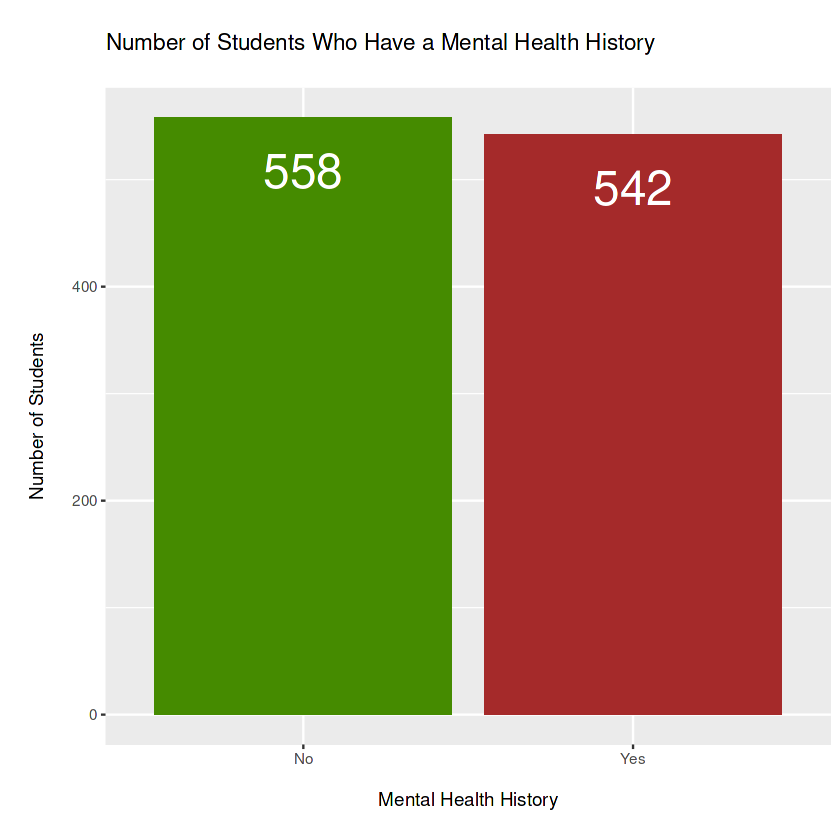

In [99]:
students_df %>%
  mutate(mental_health_history = ifelse(mental_health_history, "Yes", "No")) %>%
  ggplot(aes(mental_health_history, fill = mental_health_history)) +
  geom_bar() +
  labs(title = "\nNumber of Students Who Have a Mental Health History\n",
       x = "\nMental Health History\n", y = "\nNumber of Students\n") +
  geom_text(stat = "count", aes(label = after_stat(count)),
            vjust = 2, size = 10, color = "white") +
  theme(legend.position = "none") +
  scale_fill_manual(values = c("chartreuse4", "brown"))

About half of the students have a history of mental health issues.

#### **5.2. Psychological Factors:**
<a id="52-psychological-factors"></a>

##### 5.2.1. How many students have self-esteem below the normal level?
<a id="521"></a>

Students self-esteem was measured according to Rosenberg's Self-Esteem Scale (RSES). Scores between 15 and 25 are within normal range, so scores below 15 suggest low self-esteem.

In [100]:
students_df %>%
  filter(self_esteem < 15) %>%
  nrow()

[1] 380

How self-esteem levels (low, normal, and high) are distributed among the students is shown on the pie chart below.

The theme of the pie chart is identified before the initial drawing. Then self-esteem scores are divided into 3 ranges as new columns (Low, Normal, and High). The dataframe is elongated, so ranges are put into "levels" column and their values, which correspond to total number of studentsin each of these levels, are put into "number_of_students" column. Only first 3 rows are selected, as all the others are just duplicates. A pie chart is drawn using the trick of bending a bar plot into a closed circle.

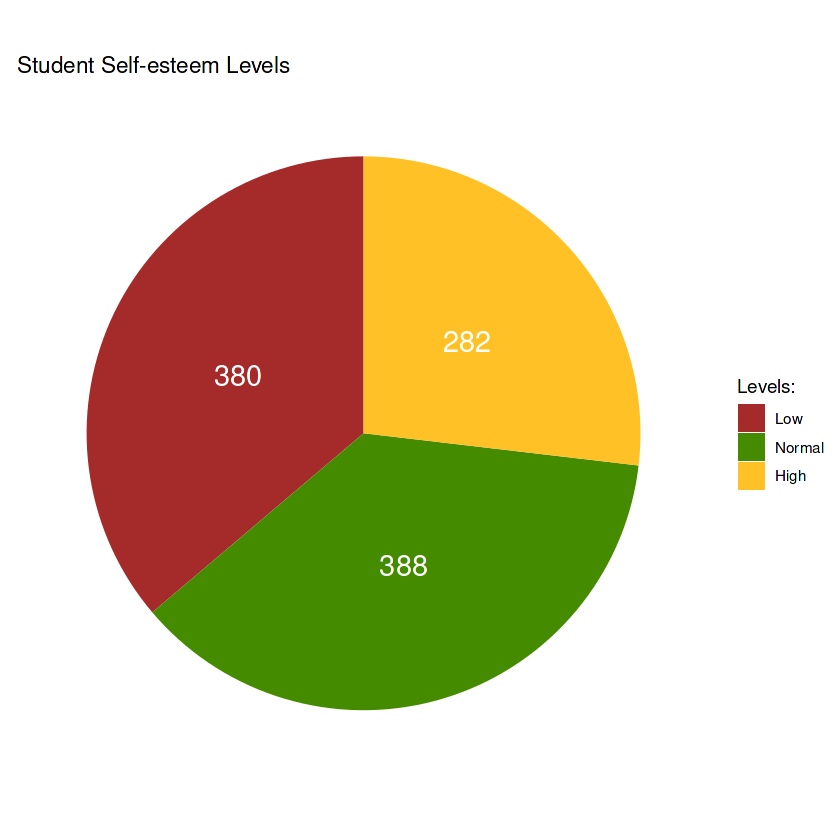

In [101]:
blank_theme <- theme_minimal() +
  theme(axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        axis.text.x = element_blank(),
        panel.border = element_blank(),
        panel.grid = element_blank(),
        axis.ticks = element_blank())

students_df %>%
  mutate(Low = sum(self_esteem < 15),
         Normal = sum(self_esteem < 26 & self_esteem > 15),
         High = sum(self_esteem > 25)) %>%
  pivot_longer(cols = Low:High,
               names_to = "levels", values_to = "number_of_students") %>%
  select(levels, number_of_students) %>%
  head(3) %>%
  ggplot(aes(x = "", y = number_of_students,
             fill = factor(levels, levels = levels))) +
  geom_bar(width = 1, stat = "identity") +
  coord_polar("y", start = 0) +
  labs(title = "Student Self-esteem Levels", fill = "Levels:") +
  geom_text(aes(label = number_of_students),
            size = 6, color = "white",
            position = position_stack(vjust = 0.5)) +
  scale_fill_manual(values = c("brown", "chartreuse4", "goldenrod1")) +
  blank_theme

Answering the question, a third of the students reported having self-esteem below the normal range.

##### 5.2.2. What percentage of students have reported experiencing depression?
<a id="522"></a>

Students depression level was measured according to Patient Health Questionnaire (PHQ-9). \
Total scores of 5, 10, 15, and 20 represent cutpoints for mild, moderate, moderately severe and severe depression, respectively. \
For mild depression result it is recommended just to retake the test after some period of time, while for getting a moderate depression result a treatment plan is recommended, considering counseling and/or pharmacotherapy. \
So scores higher than 9 will be considered to indicate depression.

In [102]:
nrow(students_df[students_df$depression > 9, ]) * 100 / nrow(students_df)

[1] 62.36364

62% of the students reported experiencing depression.

#### **5.3. Physiological Factors:**
<a id="53-physiological-factors"></a>

##### 5.3.1. How many students experience headaches frequently?
<a id="531"></a>

Scores 0-2 scores are interpreted as infrequent headache experience and 3-5 scores as frequent.

In [103]:
students_df %>%
  filter(headache > 2) %>%
  nrow()

[1] 556

About half of the students frequently experience headaches.

This number will also be shown in the plotted distribution below. Before drawing it, headache levels are categorized into 2 groups of frequency.

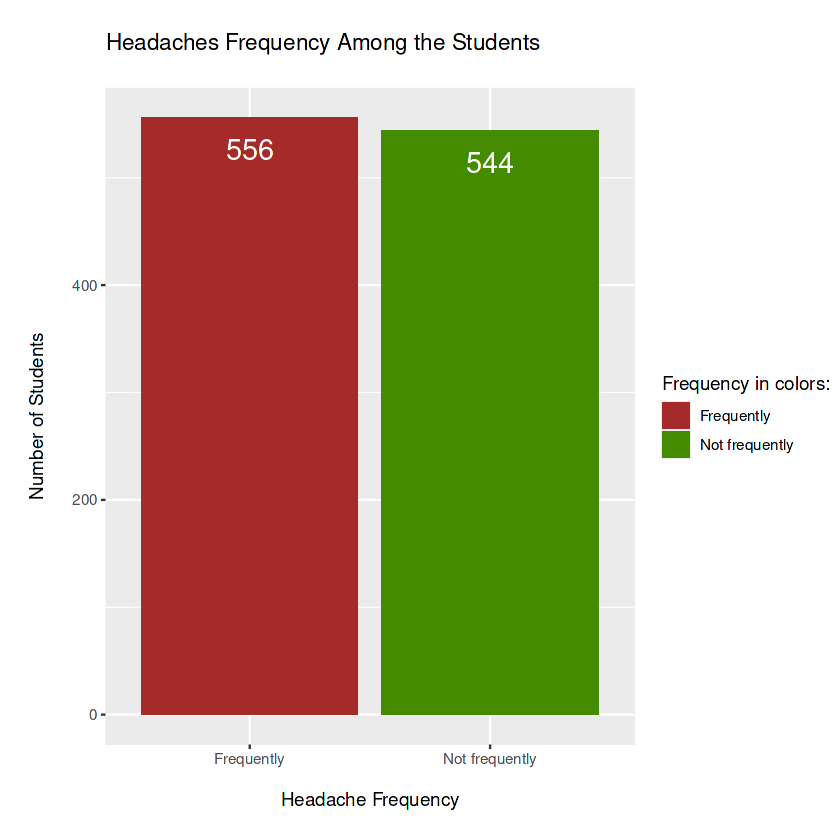

In [104]:
students_df %>%
  mutate(headache_frequency = case_when(headache <= 2 ~ "Not frequently",
                                        headache > 2 ~ "Frequently")) %>%
  ggplot(aes(as.factor(headache_frequency))) +
  geom_bar(aes(fill = headache_frequency)) +
  labs(title = "\nHeadaches Frequency Among the Students\n",
       x = "\nHeadache Frequency\n", y = "\nNumber of Students\n",
       fill = "Frequency in colors:") +
  geom_text(stat = "count", aes(label = after_stat(count)),
            vjust = 2, size = 6, color = "white") +
  scale_fill_manual(values = c("brown", "chartreuse4"))

It is also interesting to compare how many students don't have any headaches and how many of them experience constant headaches. The results may be seen in the distribution below.

In order for the bar plot to be easier to understand, headache frequency column is being added which provides a description for each of the possible values in headache column. Then the bar plot is being built with added text on each of the bars to show the specific number of students in each frequency category.

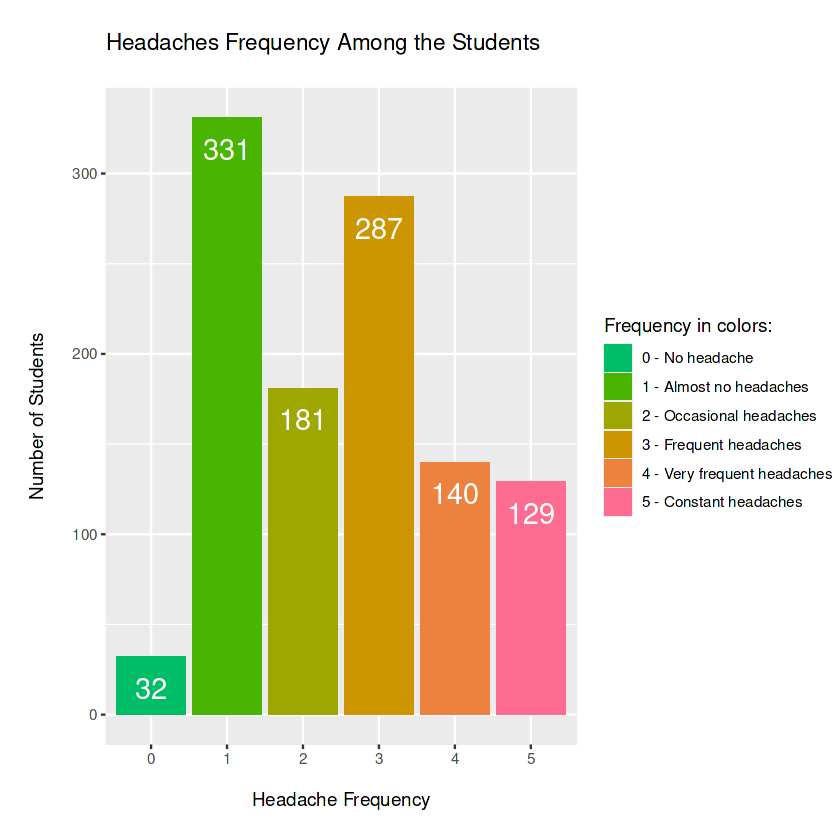

In [105]:
students_df %>%
  mutate(headache_frequency = case_when(headache == 0 ~
                                          "0 - No headache",
                                        headache == 1 ~
                                          "1 - Almost no headaches",
                                        headache == 2 ~
                                          "2 - Occasional headaches",
                                        headache == 3 ~
                                          "3 - Frequent headaches",
                                        headache == 4 ~
                                          "4 - Very frequent headaches",
                                        headache == 5 ~
                                          "5 - Сonstant headaches")) %>%
  ggplot(aes(as.factor(headache))) +
  geom_bar(aes(fill = headache_frequency)) +
  labs(title = "\nHeadaches Frequency Among the Students\n",
       x = "\nHeadache Frequency\n", y = "\nNumber of Students\n",
       fill = "Frequency in colors:") +
  geom_text(stat = "count", aes(label = after_stat(count)),
            vjust = 2, size = 6, color = "white") +
  scale_fill_hue(h = c(150, 0))

There are 4 times more students who have constant headaches in comparisson to those who have none. Almost all of the students experience headaches from time to time.

##### 5.3.2. What is the average blood pressure reading among the students?
<a id="532"></a>

In [106]:
mean(students_df$blood_pressure)

[1] 2.181818

A value of 1 is interpreted as low blood pressure, 2 as normal and 3 as high blood pressure. \
Hence, the average student blood pressure reading is slightly above a normal blood pressure.

##### 5.3.3. How many students rate their sleep quality as poor?
<a id="533"></a>

Values 0 and 1 are considered to indicate poor sleep quality.

In [107]:
students_df %>%
  filter(sleep_quality < 2) %>%
  nrow()

[1] 362

How sleep quality levels are distributed among the students is shown on the pie chart below.

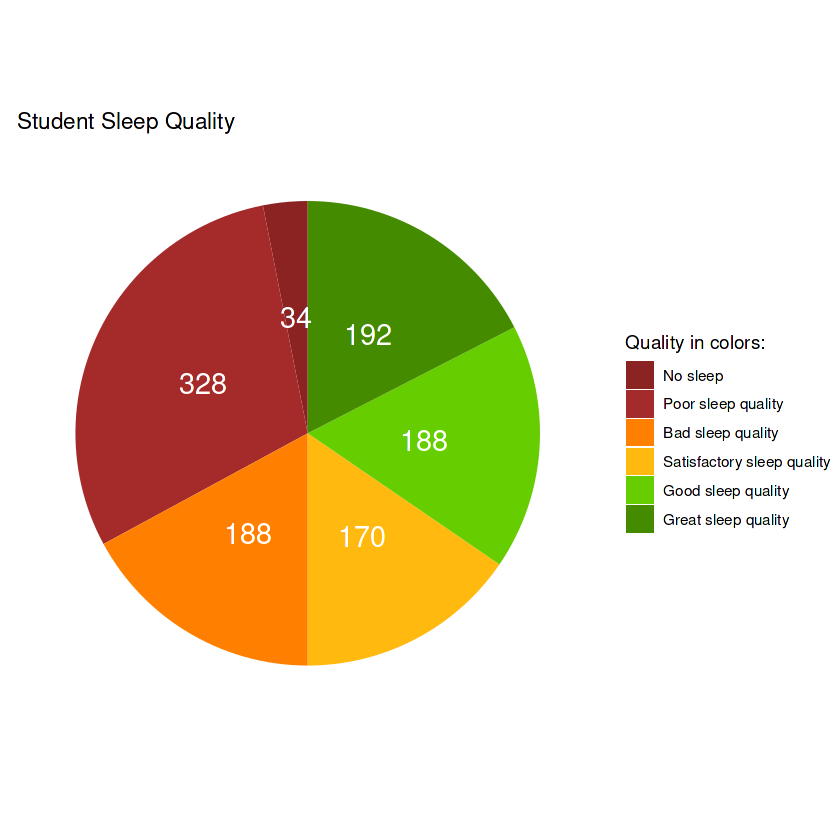

In [108]:
# Creates a vector of strings for a legend in pie chart
sleep_quality_description <- c("No sleep", "Poor sleep quality",
                               "Bad sleep quality",
                               "Satisfactory sleep quality",
                               "Good sleep quality",
                               "Great sleep quality")

students_df %>%
  select(sleep_quality) %>%
  table() %>%  # Calculates totals by value
  as.data.frame() %>%  # Converts back to a dataframe
  ggplot(aes(x = "", y = Freq,  # Draws a pie chart
             fill = factor(sleep_quality_description,
                           levels = sleep_quality_description))) +
  geom_bar(width = 1, stat = "identity") +
  coord_polar("y", start = 0) +
  labs(title = "Student Sleep Quality", fill = "Quality in colors:") +
  geom_text(aes(label = Freq),
            size = 6, color = "white",
            position = position_stack(vjust = 0.5)) +
  scale_fill_manual(values = c("brown4", "brown", "darkorange1",
                               "darkgoldenrod1", "chartreuse3",
                               "chartreuse4")) +
  blank_theme

One third of the students reported to have poor sleep quality.

#### **5.4. Environmental Factors:**
<a id="54-environmental-factors"></a>

##### 5.4.1. How many students live in conditions with high noise levels?
<a id="541"></a>

Scores 4 and 5 are considered to indicate high noise levels.

In [109]:
students_df %>%
  filter(noise_level > 3) %>%
  nrow()

[1] 274

How noise levels are distributed among the students is shown on the pie chart below.

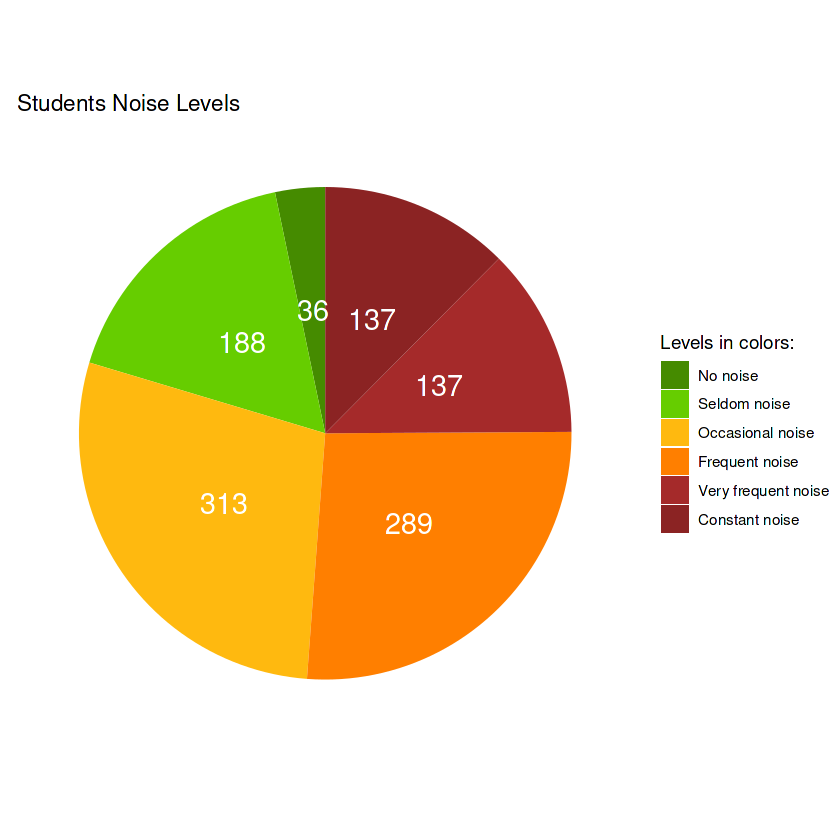

In [110]:
# Creates a vector of strings for a legend in pie chart
noise_level_description <- c("No noise", "Seldom noise",
                             "Occasional noise", "Frequent noise",
                             "Very frequent noise", "Constant noise")

students_df %>%
  select(noise_level) %>%
  table() %>%  # Calculates totals by value
  as.data.frame() %>%  # Converts back to a dataframe
  ggplot(aes(x = "", y = Freq,  # Draws a pie chart
             fill = factor(noise_level_description,
                           levels = noise_level_description))) +
  geom_bar(width = 1, stat = "identity") +
  coord_polar("y", start = 0) +
  labs(title = "Students Noise Levels", fill = "Levels in colors:") +
  geom_text(aes(label = Freq),
            size = 6, color = "white",
            position = position_stack(vjust = 0.5)) +
  scale_fill_manual(values = c("chartreuse4", "chartreuse3", "darkgoldenrod1",
                               "darkorange1", "brown", "brown4")) +
  blank_theme

About a quarter of the students live in conditions with high noise levels.

##### 5.4.2. What percentage of students feel unsafe in their living conditions?
<a id="542"></a>

Scores 0 and 1 are considered to indicate unsafe conditions.

In [111]:
nrow(students_df[students_df$safety < 2, ]) / nrow(students_df) * 100

[1] 19.72727

Almost 20% of the students live in unsafe conditions.

##### 5.4.3. How many students have reported not having their basic needs met?
<a id="543"></a>

Scores 0 and 1 are considered to indicate not satisfied basic needs.

In [112]:
students_df %>%
  filter(basic_needs < 2) %>%
  nrow()

[1] 213

How basic needs are satisfied among the students is shown on the pie chart below.

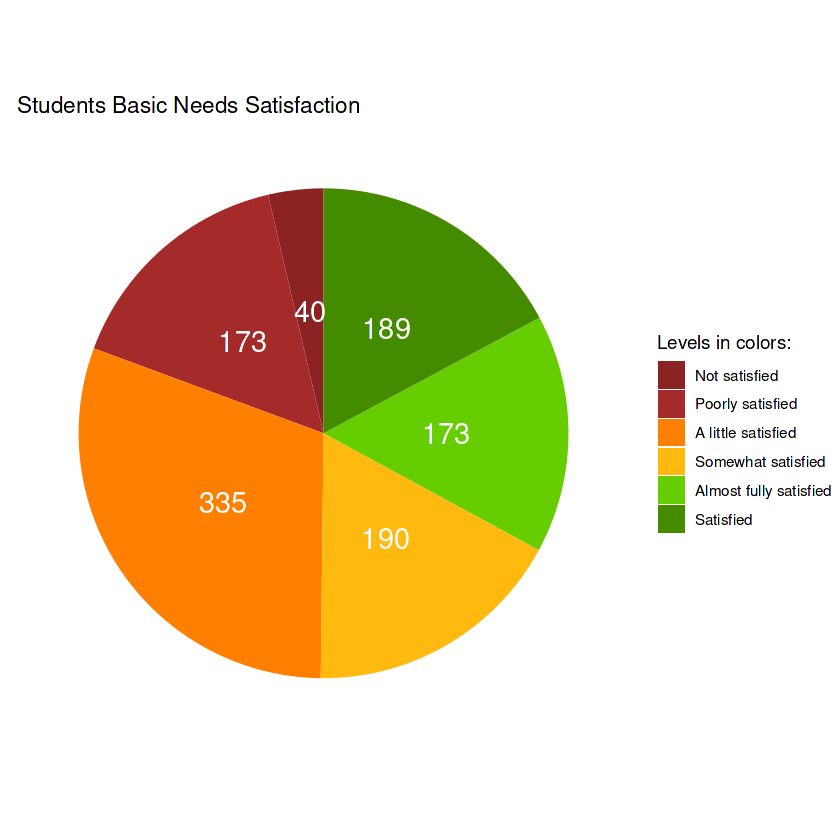

In [113]:
# Creates a vector of strings for a legend in pie chart
basic_needs_description <- c("Not satisfied", "Poorly satisfied",
                             "A little satisfied", "Somewhat satisfied",
                             "Almost fully satisfied", "Satisfied")

students_df %>%
  select(basic_needs) %>%
  table() %>%  # Calculates totals by value
  as.data.frame() %>%  # Converts back to a dataframe
  ggplot(aes(x = "", y = Freq,  # Draws a pie chart
             fill = factor(basic_needs_description,
                           levels = basic_needs_description))) +
  geom_bar(width = 1, stat = "identity") +
  coord_polar("y", start = 0) +
  labs(title = "Students Basic Needs Satisfaction",
       fill = "Levels in colors:") +
  geom_text(aes(label = Freq),
            size = 6, color = "white",
            position = position_stack(vjust = 0.5)) +
  scale_fill_manual(values = c("brown4", "brown", "darkorange1",
                               "darkgoldenrod1", "chartreuse3",
                               "chartreuse4")) +
  blank_theme

Less than a quarter of the students don't have their basic needs met.

#### **5.5. Academic Factors:**
<a id="55-academic-factors"></a>

##### 5.5.1. How many students rate their academic performance as below average?
<a id="551"></a>

In [114]:
students_df %>%
  filter(academic_performance < mean(academic_performance)) %>%
  nrow()

[1] 561

Bigger half of the students rated their their academic performance as below average.

In fact, 2 is the score students reported the most, which is almost twice as popular as any other score.

In [115]:
academic_performance_table <- students_df %>%
  group_by(academic_performance) %>%
  summarize(number_of_students = n())
academic_performance_table

academic_performance,number_of_students
<int>,<int>
0,28
1,185
2,348
3,169
4,188
5,182


##### 5.5.2. What is the average study load reported by students?
<a id="552"></a>

In [116]:
mean(students_df$study_load)

[1] 2.621818

In [117]:
table(students_df$study_load)


  0   1   2   3   4   5 
 37 185 333 275 142 128 

It is clear that almost all students have some amount of study load, with the most usual amount being measured as 2 and 3 from 0-5. And the average value is 2.6.

#### **5.6. Social Factors:**
<a id="56-social-factors"></a>

##### 5.6.1. How many students feel they have strong social support?
<a id="561"></a>

In [118]:
table(students_df$social_support)


  0   1   2   3 
 88 412 142 458 

Only score 3 will be interpreted as strong social support, which was reported by 458 students.

##### 5.6.2. What percentage of students have experienced bullying?
<a id="562"></a>

Scores higher than 2 mean bullying experience.

In [119]:
nrow(students_df[students_df$bullying > 2, ]) / nrow(students_df) * 100

[1] 50.81818

51% of the students have experienced bullying.

#### **5.7. Comparative Analysis:**
<a id="57-comarative-analysis"></a>

##### 5.7.1. Is there a correlation between anxiety level and academic performance?
<a id="571"></a>

In [120]:
cor(x = students_df$anxiety_level, y = students_df$academic_performance)

[1] -0.6496011

There is a moderate correlation between anxiety level and academic performance. \
In particular, a negative correlation means that the higher the anxiety level is, the lower the academic performance score is.

##### 5.7.2. Are students who experience bullying more likely to have a history of mental health issues?
<a id="572"></a>

In [121]:
cor(x = students_df$bullying, y = students_df$mental_health_history)

[1] 0.6243658

There is a moderate positive correlation between bullying scores and answears on having a mental health issues history. This implies, that those students who experience bullying are prone to have a history of mental health issues.

#### **5.8. General Exploration:**
<a id="58-general-exploration"></a>

##### 5.8.1. Which factor (Psychological, Physiological, Environmental, Academic, Social) has the highest number of students reporting negative experiences or conditions?
<a id="581"></a>

To start, there has to be a defined negative experience threshold for each factor. The question is whether scores that are higher or lower correspond to negative experiences.

Negative experience goes hand in hand with stress. For this reason, there will be identified the correlation values between each factor and stress level.

In [122]:
# What is the index of stress_level target feature
grep("stress_level", colnames(students_df))

[1] 21

In [123]:
# Builds a correlation matrix between stress level and all the factors
cor_data <- cor(students_df[, -21],
                students_df$stress_level)
cor_data

anxiety_level,0.7367954
self_esteem,-0.7561951
mental_health_history,0.6486440
depression,0.7343786
headache,0.7134840
blood_pressure,0.3941999
sleep_quality,-0.7490679
breathing_problem,0.5739837
noise_level,0.6633713
living_conditions,-0.5817231
safety,-0.7096016


For a visual representation a correlation heatmap will be shown.

In [124]:
# Creates a dataframe out of the correlation matrix
cor_data_df <- data.frame(factors = rownames(cor_data),
                          # Makes this x column for a tile plot
                          x = rep(1, times = 20),
                          correlation = cor_data[, 1])

row.names(cor_data_df) <- NULL  # Removes unnecessary row names

cor_data_df <- cor_data_df %>%  # Sorts by the greatest correlation
  arrange(abs(correlation))

# Convers column factors from type char to factor
# to preserve its order on the future plot
cor_data_df$factors <- factor(cor_data_df$factors, levels = cor_data_df$factors)

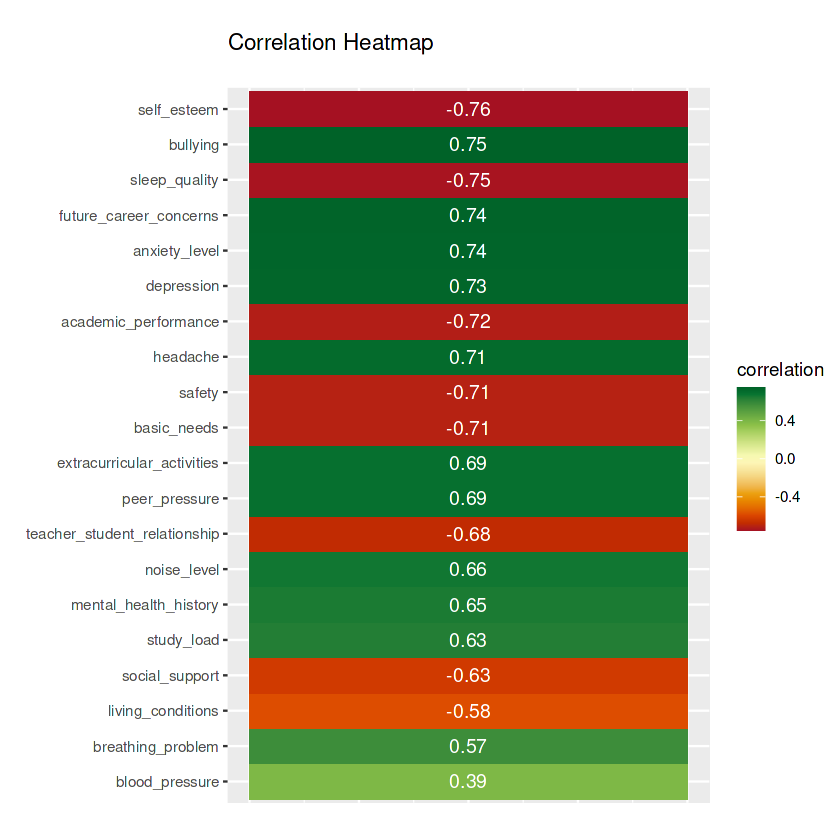

In [125]:
# Draws a correlation heatmap
ggplot(cor_data_df, aes(x = x, y = factors, fill = correlation)) +
  geom_tile() +
  labs(title = "\nCorrelation Heatmap\n",
       x = "", y = "") +
  # Shows the correlation values
  geom_text(aes(x, factors, label = round(correlation, digits = 2)),
            color = "white", size = 4) +
  theme(axis.text.x = element_blank(), axis.ticks.x = element_blank()) +
  scale_fill_gradientn(colors = hcl.colors(20, "RdYlGn"))

From this heatmap a greater correlation values are found on the top, having self-esteem in first place carrying the strongest correlation with stress. And blood pressure has the weakest linear correlation with stress.

Now, there will be decided threshold values and a new dataframe will be created with binary values indicating a positive (0) or negative (1) experience in each factor.

In [126]:
# Finds factors with 0-5 scale
factors_five_scale <- students_df %>%
  select(where(function(x) max(x) == 5)) %>%
  names()
factors_five_scale

[1] "headache"                     "sleep_quality"               
 [3] "breathing_problem"            "noise_level"                 
 [5] "living_conditions"            "safety"                      
 [7] "basic_needs"                  "academic_performance"        
 [9] "study_load"                   "teacher_student_relationship"
[11] "future_career_concerns"       "peer_pressure"               
[13] "extracurricular_activities"   "bullying"

In [127]:
# Transposes a cor_data matrix, so row names with factors become column names
# and converts to a dataframe
cor_data_t <- data.frame(t(cor_data))

# What factors are positively correlated with stress
pos_cor_factors <- c(apply(cor_data_t, 1, function(x) names(cor_data_t)[x > 0]))
pos_cor_factors

[1] "anxiety_level"              "mental_health_history"     
 [3] "depression"                 "headache"                  
 [5] "blood_pressure"             "breathing_problem"         
 [7] "noise_level"                "study_load"                
 [9] "future_career_concerns"     "peer_pressure"             
[11] "extracurricular_activities" "bullying"

In [128]:
# Creates an empty dataframe
experience_df <- data.frame(matrix(nrow = nrow(students_df),
                                   ncol = ncol(students_df[, -21])))
colnames(experience_df) <- colnames(students_df[, -21])
head(experience_df)

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,safety,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying
,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [129]:
# Fills in the experience_df according to decided thresholds for each factor
experience_df <- students_df[, -21] %>%
  mutate(anxiety_level = ifelse(anxiety_level > 9, 1, 0),
         self_esteem = ifelse(self_esteem < 15, 1, 0),
         depression = ifelse(depression > 9, 1, 0),
         blood_pressure = ifelse(blood_pressure != 2, 1, 0),
         social_support = ifelse(social_support < 2, 1, 0),
         across(all_of(factors_five_scale[factors_five_scale %in% pos_cor_factors]),
                function(x) ifelse(x >= 3, 1, 0)),
         across(all_of(factors_five_scale[! factors_five_scale %in% pos_cor_factors]),
                function(x) ifelse(x < 3, 1, 0)))

head(experience_df)

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,safety,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,1,0,1,1,0
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0,1,1,0,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,1,1,0,1
6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [130]:
# Top five factors with negative experience
neg_experience_sum <- sort(colSums(experience_df), decreasing = TRUE)
print(neg_experience_sum[1:5])

              blood_pressure                   depression 
                         800                          686 
               anxiety_level teacher_student_relationship 
                         651                          585 
                      safety 
                         565 


In [131]:
# Sums up students with at least one negative experience in each factor group
psychological_number <- sum(apply(experience_df[, psychological_factors], 1,
                                  function(row) any(row == 1)))

physiological_number <- sum(apply(experience_df[, physiological_factors], 1,
                                  function(row) any(row == 1)))

environmental_number <- sum(apply(experience_df[, environmental_factors], 1,
                                  function(row) any(row == 1)))

academic_number <- sum(apply(experience_df[, academic_factors], 1,
                             function(row) any(row == 1)))

social_number <- sum(apply(experience_df[, social_factors], 1,
                           function(row) any(row == 1)))

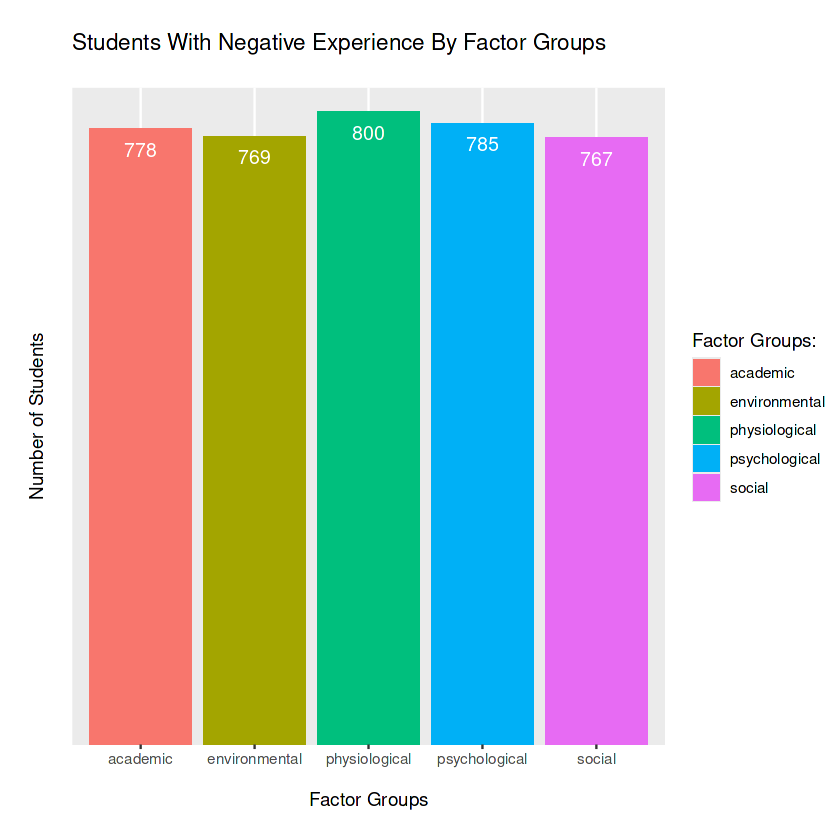

In [132]:
factor_groups <- c("psychological", "physiological", "environmental",
                   "academic", "social")

neg_experience_numbers <- c(psychological_number, physiological_number,
                            environmental_number, academic_number,
                            social_number)

# Creates a dataframe with factor groups as columns
# and their number of students with negative experience as values
total_experience_grouped_df <- data.frame(factor_groups, neg_experience_numbers)

# Draws a bar plot
total_experience_grouped_df %>%
  ggplot(aes(x = factor_groups, y = neg_experience_numbers)) +
  geom_col(aes(fill = factor_groups)) +
  labs(title = "\nStudents With Negative Experience By Factor Groups\n",
       fill = "Factor Groups:",
       x = "\nFactor Groups\n", y = "\nNumber of Students\n",
       axis.label.x = element_text(angle = 45)) +
  geom_text(aes(label = neg_experience_numbers), vjust = 2, size = 4,
            color = "white") +
  scale_y_discrete(expand = c(0, 0, 0, 30))

The Physiologial factor group has the most students with negative experience. This is due to blood pressure factor totals 800 students with bad scores (high blood pressure as "3" and low blood pressure as "1", while only "2" as normal).

So then it is important to take into consideration Psychological as the second largest factor group with depression factor totaling 686 students.

##### 5.8.2. Are there any noticeable trends or patterns when comparing different factors?
<a id="582"></a>

To facilitate the process, there will be chosen a few factors (main factors), which have the strongest correlations with stress level, and other factors, which are correlated with these main factors.

In [133]:
# Extracts top five columns from cor_df with the highest correlation values
cor_main <- slice_max(as.data.frame(cor_data), n = 5, order_by = abs(V1))
rownames(cor_main)

[1] "self_esteem"            "bullying"               "sleep_quality"         
[4] "future_career_concerns" "anxiety_level"

In [134]:
# Shows other factors that are strongly correlated with cor_main factors
lapply(rownames(cor_main),
  function(x) {
    slice_max(as.data.frame(cor(students_df[, names(students_df) != x],
                                students_df[, names(students_df) == x])),
              n = 5, order_by = abs(V1))
  }
)

,V1
,<dbl>
stress_level,-0.7561951
future_career_concerns,-0.7125195
depression,-0.6996018
social_support,0.6792110
anxiety_level,-0.6727453
,V1
,<dbl>
stress_level,0.7511623
future_career_concerns,0.7112781


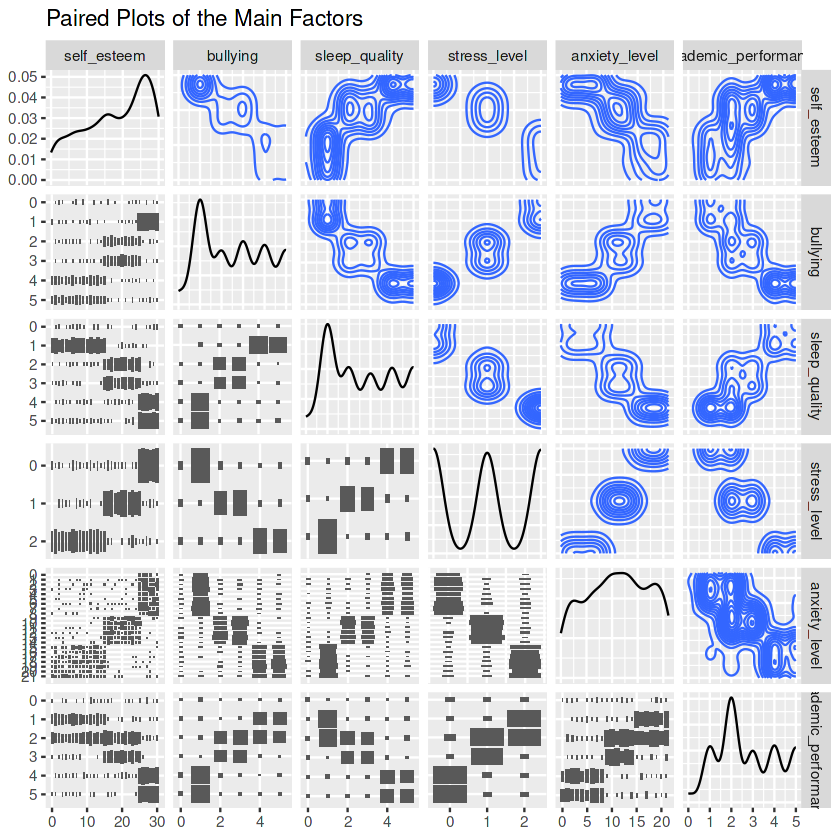

In [135]:
# Compares the chosen factors on paired plots
ggpairs(students_df %>%
    select(all_of(c("self_esteem", "bullying", "sleep_quality",
                    "stress_level", "anxiety_level", "academic_performance"))),
  title = "Paired Plots of the Main Factors",
  upper = list(continuous = "density"),
  lower = list(continuous = "count")
)

From the distributions on the diagonal, it can be derived that most of the students have normal to high self-esteem, had a little encounter with bullying, and poor sleep quality.

In [136]:
cor(students_df$academic_performance, students_df$sleep_quality)

[1] 0.6713263

From the paired plots there is a noticeable positive correlation between academic performance and sleep quality. \
After checking the correlation value, it is clear that great academic performance is highly related to sufficient sleep quality. The conclusion is that studying instead of sleeping will unlikely lead to academic success.

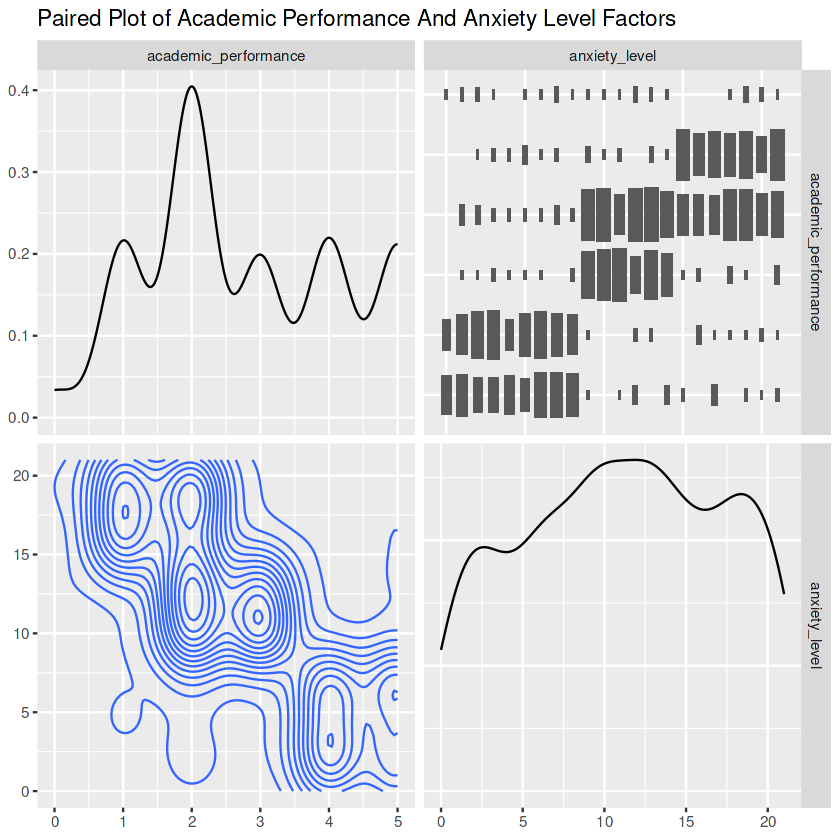

In [137]:
# Seperates paired plot with academic_performance and anxiety_level factors
ggpairs(students_df %>%
          select(all_of(c("academic_performance", "anxiety_level"))),
        title = "Paired Plot of Academic Performance And Anxiety Level Factors",
        upper = list(continuous = "count"),
        lower = list(continuous = "density"))

In [138]:
academic_anxiety_prob <- data.frame(
  academic_score = c(0:5),
  high_anxiety_probability = sapply(
    0:5,
    function(x) {
      sum(students_df$academic_performance == x & students_df$anxiety_level > 9) /
        sum(students_df$academic_performance == x)
    }
  )
)

academic_anxiety_prob

academic_score,high_anxiety_probability
<int>,<dbl>
0,0.53571429
1,0.91891892
2,0.85057471
3,0.79881657
4,0.07446809
5,0.11538462


The plot intended to show a specific academic performance score that students got while not having high anxiety. \
Then by calculating conditional probabilities, it was found that students who got their academic performance score as 4 are the least likely to have high anxiety levels (7%). Moreover, students who scored as 5 on academic performance are a little more likely to have high anxiety (12%).

##### 5.8.3. Which specific feature within each group of factors has the most significant impact on student stress, based on the dataset?
<a id="583"></a>

There will be a model built to predict stress levels and access features importance from the results of a trained model. Features importance will tell the significance of each of the factors impact on student stress. \
Also, this is a classification problem with 3 classes in question (0, 1, and 2 stress levels to define). \
The chosen model is a random forest classifier.

In [139]:
# Makes target variable categorical to set random forest model as a classifier
students_df$stress_level <- as.factor(students_df$stress_level)

Training a random forest classifier model with default parameters:

In [140]:
set.seed(21)  # Sets seed for reproducibility

# Defines repeated cross-validation for later model evaluation
# with 5 folds and three repeats
cv <- trainControl(method = "repeatedcv", number = 5, repeats = 3)

# Default setting for the number of variables
# randomly sampled as candidates at each split
mtry <- floor(sqrt(ncol(students_df[, -21])))
tune_grid <- expand.grid(.mtry = mtry)

# Builds the model
rf_default <- train(stress_level ~ ., data = students_df, method = "rf",
                    metric = "Accuracy", tuneGrid = tune_grid, trControl = cv)
print(rf_default)

Random Forest 

1100 samples
  20 predictor
   3 classes: '0', '1', '2' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 3 times) 
Summary of sample sizes: 880, 881, 880, 879, 880, 880, ... 
Resampling results:

  Accuracy  Kappa    
  0.879696  0.8194587

Tuning parameter 'mtry' was held constant at a value of 4


Training a random forest model while tuning the mtry hyperparameter using random search cross-validation:

Random Forest 

1100 samples
  20 predictor
   3 classes: '0', '1', '2' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 3 times) 
Summary of sample sizes: 880, 881, 880, 879, 880, 880, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   3    0.8787773  0.8180946
  10    0.8763488  0.8144410
  11    0.8751395  0.8126292
  15    0.8766574  0.8149074
  16    0.8769590  0.8153561

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 3.


Cross-Validated (5 fold, repeated 3 times) Confusion Matrix 

(entries are percentual average cell counts across resamples)
 
          Reference
Prediction    0    1    2
         0 29.7  2.3  2.5
         1  1.4 28.3  1.2
         2  2.9  1.9 29.9
                            
 Accuracy (average) : 0.8788


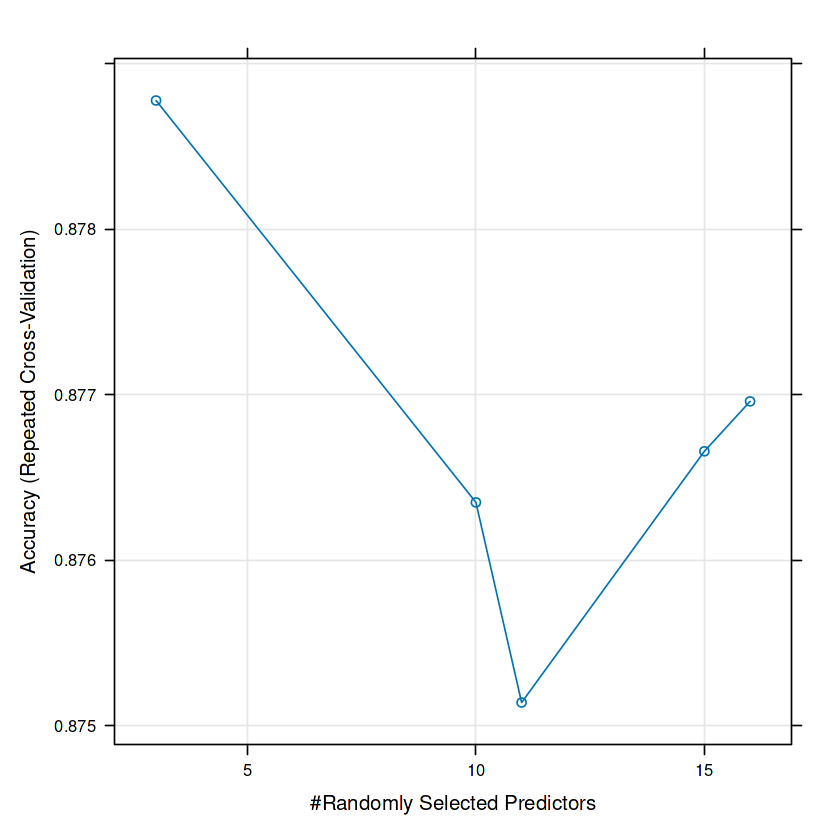

In [141]:
set.seed(21)  # Sets seed for reproducibility

# Defines repeated cross-validation for later model evaluation
# with 5 folds and three repeats
randomsearch_cv <- trainControl(method = "repeatedcv", number = 5, repeats = 3,
                                search = "random")
mtry <- floor(sqrt(ncol(students_df[, -21])))

# Trains a model while tuning mtry
rf_model <- train(stress_level ~ ., data = students_df, method = "rf",
                  metric = "Accuracy", tuneLength = 5,
                  trControl = randomsearch_cv)
print(rf_model)
confusionMatrix(rf_model)
plot(rf_model)

The tuned mtry is 3, while the default is:

In [142]:
mtry

[1] 4

The model has an 88% accuracy. The stress level "1", meaning moderate stress, is the best predicted.

The factor importance table and plot:

rf variable importance

                             Overall
blood_pressure               100.000
sleep_quality                 75.840
depression                    53.911
academic_performance          47.112
future_career_concerns        46.952
safety                        46.387
bullying                      44.415
extracurricular_activities    42.596
basic_needs                   39.253
teacher_student_relationship  38.909
anxiety_level                 38.699
social_support                38.373
self_esteem                   33.930
headache                      32.955
peer_pressure                 31.478
noise_level                   15.052
study_load                     9.126
living_conditions              8.251
breathing_problem              5.479
mental_health_history          0.000

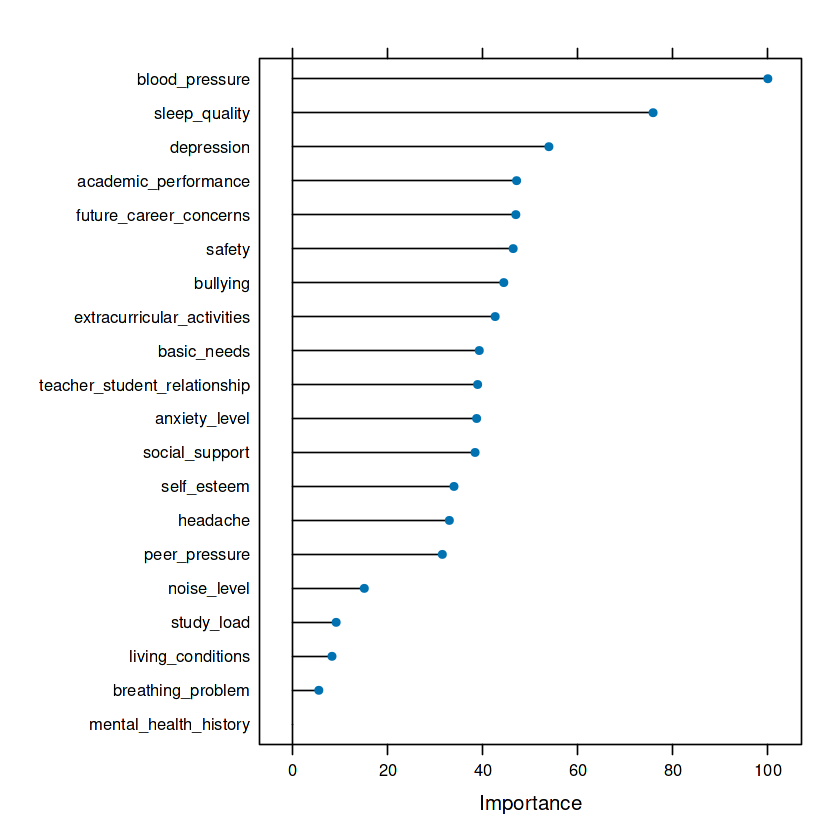

In [143]:
varImp(rf_model)
plot(varImp(rf_model))

The final result is interesting. Blood pressure is the factor with the highest impact on student stress. \
It was impossible to know this relying only on the linear correlation between factors and stress level. Blood pressure factor doesn't have a linear correlation with stress level, indeed. Because blood pressure score is only "good" when in the middle of the possible range 1-3, while 1 and 3 being "bad" scores. Whereas stress level score ascends from 0 as the "best" score to 2 as the "worst" score.

In [144]:
# Changes back the stress_level feature from being as factor to numeric type
students_df$stress_level <- as.numeric(students_df$stress_level)

# Calculates correlation to remind that it is weak
cor(students_df$blood_pressure, students_df$stress_level)

[1] 0.3941999

The relationship between them is rather similar to parabolic. \
There is a scatter plot with a line to show this.

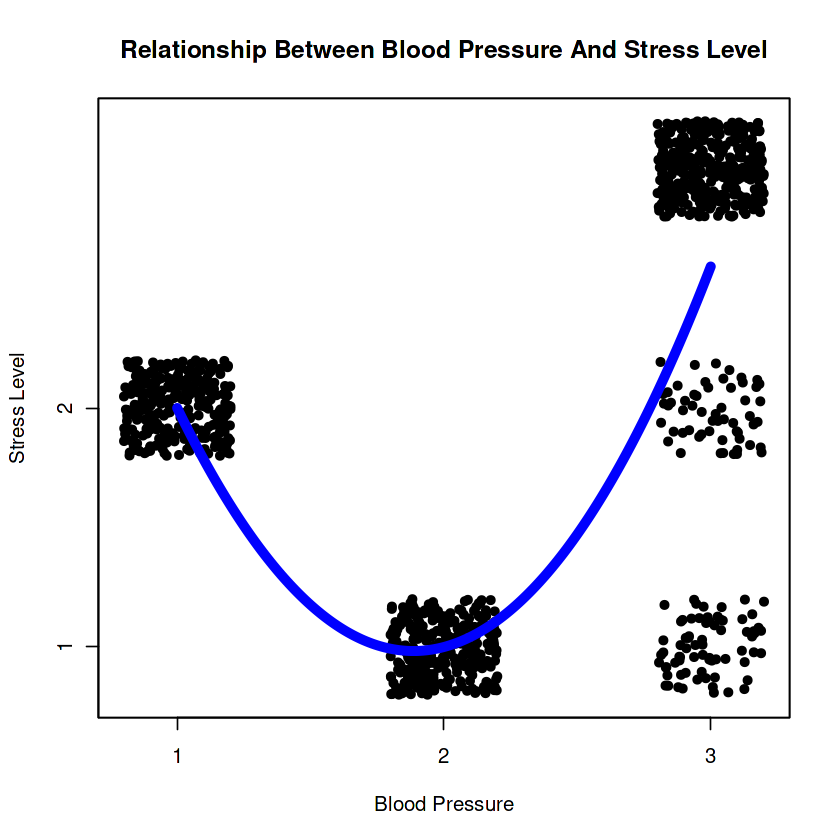

In [145]:
blood_pressure2 <- students_df$blood_pressure^2
quadratic_model <- lm(stress_level ~ blood_pressure + blood_pressure2,
                      data = students_df)

blood_pressure_values <- seq(1, 3, 0.01)
stress_predict <- predict(quadratic_model,
                          list(blood_pressure = blood_pressure_values,
                               blood_pressure2 = blood_pressure_values^2))
plot(jitter(students_df$blood_pressure),
     jitter(students_df$stress_level), pch = 16,
     main = "Relationship Between Blood Pressure And Stress Level",
     xlab = "Blood Pressure", ylab = "Stress Level",
     xaxp = c(1, 3, 2), yaxp = c(0, 2, 2))
box()
lines(blood_pressure_values, stress_predict, col = "blue", lwd = 6)

In [146]:
summary(quadratic_model)


Call:
lm(formula = stress_level ~ blood_pressure + blood_pressure2, 
    data = students_df)

Residuals:
   Min     1Q Median     3Q    Max 
-1.592  0.000  0.000  0.408  0.408 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      5.59200    0.12279   45.54   <2e-16 ***
blood_pressure  -4.88800    0.13831  -35.34   <2e-16 ***
blood_pressure2  1.29600    0.03369   38.47   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4931 on 1097 degrees of freedom
Multiple R-squared:  0.6405,	Adjusted R-squared:  0.6398 
F-statistic: 977.1 on 2 and 1097 DF,  p-value: < 2.2e-16


## 6. Act Phase

Stress is real. There are obviously more than twenty reasons for stress and stress itself is a fuel for the worsening of its factors. The results of analysis are these three key findings.

1. Stress can be identified from the physical state. If a person has low blood pressure, they most likely are stressed. High blood pressure indicates even higher level of stress. A good practice in any educational facility is to monitor the health of its students.

2. Poor mental health state is not uncomon amongst the students. The good news is that most of them faced only a bit of bullying, although it still affects mental health directly, leaving a chance of developing a mental illness. Bullying can be avoided by setting clear and specific rules against it and creating an environment where all basic needs will be satisfied.

3. The higher the academic performance score is, the lower the anxiety level is. But peace comes not with the highest academic performance score, but the one below it (4 instead of 5). So it is important to give students various opportunities for activities in other sectors outside of academics, and to make sure that they are able to have balanced lives.

Additionally, surveys, similar to the one that is the data source for this dataset, are a great way to find areas for improvement and make students feel more welcome and well-respected.

The final conclusion of this analysis is to take into consideration the relationships between all of the named groups of stress factors and not neglect the presence of stress.

## 7. Conclusion

The business task was resolved and the results shared in the Share and Analyze Phase and Act Phase. Moreover, additional discoveries were made throughout the process of analysis and were shown in this notebook.

This capstone project was intended to demonstrate a variety of hard and soft skills.

While writing code in R for the analysis working with different types of vectors: atomic vectors, lists, dataframes as augmented vectors, tables, and matrices. In the Process Phase data was assured to be clean and previewed. During the research, there were demonstrations of visualized data from findings using ggplot2 and GGally R packages. The work also included analyzing mean values of a few data samples, additionally using methods from probability and statistics, such as linear correlation and quadratic regression, and calculating conditional probability to prove a certain relationship. At the end there was shown the ability to choose a prediction model for a specific problem, the hyperparameter tuning, and cross-validation usage.

Even discreet relationships were found (as in the case of high academic performance and anxiety) which showed attention to detail. In order to decide on a prediction model the type of a prediction problem had to be identified, the time complexity, and the question about variable significance levels had to be considered. All of these aspects were important, so the decision was made with critical thinking. Problem-solving skills were shown in the approaches to dividing data into rationally chosen categories for a better understanding.

In summary, this capstone project successfully addressed the business task and uncovered interesting insights through comprehensive analysis in R, while proving the effective studying in the Google Data Analytics course.